<h1>Song Popularity Prediction<h1>

In [1]:
#Import required libraries
import numpy as np #arrays and matrices manipulation
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Import dataset
dataframe = pd.read_csv('archive/Spotify_2018.csv')
dataframe.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


In [3]:
dataframe.describe()
#print(dataframe.keys())

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,116372.000000,116372.000000,1.163720e+05,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000
mean,0.335472,0.582476,2.125462e+05,0.571829,0.230127,5.239894,0.194196,-9.944835,0.607534,0.112204,119.603767,3.883005,0.438393,24.235082
std,0.343066,0.189869,1.243208e+05,0.258560,0.363406,3.603924,0.167389,6.503818,0.488302,0.124382,30.151621,0.508566,0.259566,17.931939
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029500,0.461000,1.640490e+05,0.401000,0.000000,2.000000,0.097400,-11.845250,0.000000,0.038900,96.131000,4.000000,0.222000,10.000000
50%,0.194000,0.606000,2.017730e+05,0.605000,0.000187,5.000000,0.123000,-7.992000,1.000000,0.056000,120.031500,4.000000,0.419000,22.000000
75%,0.620000,0.728000,2.402685e+05,0.776000,0.491000,8.000000,0.234000,-5.701000,1.000000,0.129000,139.783000,4.000000,0.637000,35.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


<h4>Data Cleaning<h4>

In [4]:
#Check null values
pd.isnull(dataframe).sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

<h4>Data Analytics & Visualizations</h4>

Text(0.5, 1.0, 'Popularity Distribution')

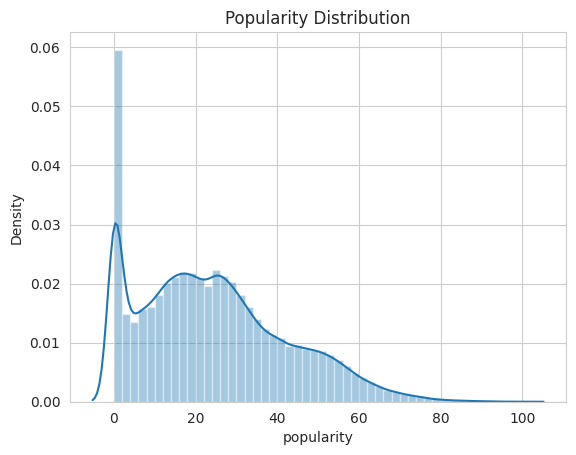

In [5]:
#The histogram shows the frequency of the values in the popularity column. 
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [6]:
#Let's compute the pairwise correlation of columns
dataframe.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
acousticness,1.000000,-0.347603,0.027721,-0.702147,0.264696,-0.017190,-0.097720,-0.594194,0.064123,-0.113447,-0.214478,-0.161068,-0.173919,-0.103426
danceability,-0.347603,1.000000,-0.119003,0.269597,-0.298647,0.018734,-0.140081,0.419209,-0.055092,0.243935,0.077065,0.205079,0.461293,0.133896
duration_ms,0.027721,-0.119003,1.000000,-0.017604,0.025604,-0.000839,-0.003206,-0.015617,0.007500,-0.091607,-0.008191,0.019936,-0.139257,-0.009449
energy,-0.702147,0.269597,-0.017604,1.000000,-0.290547,0.036973,0.212474,0.759348,-0.064930,0.104600,0.228787,0.162655,0.305511,0.120067
instrumentalness,0.264696,-0.298647,0.025604,-0.290547,1.000000,-0.025169,-0.053619,-0.506144,-0.005603,-0.220181,-0.085529,-0.087218,-0.243302,-0.210233
key,-0.017190,0.018734,-0.000839,0.036973,-0.025169,1.000000,0.007265,0.025853,-0.178317,0.007501,0.004988,0.007652,0.040786,0.002702
liveness,-0.097720,-0.140081,-0.003206,0.212474,-0.053619,0.007265,1.000000,0.060970,-0.003089,0.104808,-0.013540,-0.019526,-0.011702,-0.027686
loudness,-0.594194,0.419209,-0.015617,0.759348,-0.506144,0.025853,0.060970,1.000000,-0.031542,0.074911,0.222821,0.178831,0.314565,0.235072
mode,0.064123,-0.055092,0.007500,-0.064930,-0.005603,-0.178317,-0.003089,-0.031542,1.000000,-0.055150,0.001771,-0.038044,0.016912,-0.011800
speechiness,-0.113447,0.243935,-0.091607,0.104600,-0.220181,0.007501,0.104808,0.074911,-0.055150,1.000000,0.052224,0.053536,0.119031,-0.001261


<Axes: >

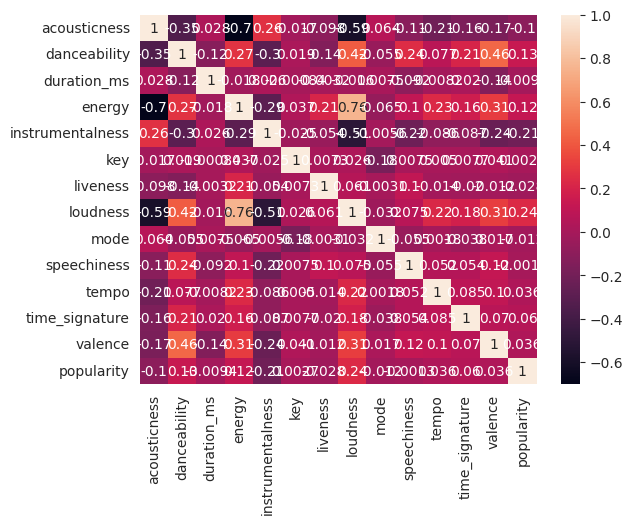

In [7]:
sns.heatmap(dataframe.corr(), annot=True)

Text(0.5, 1.0, 'Popularity Based on Time Signature')

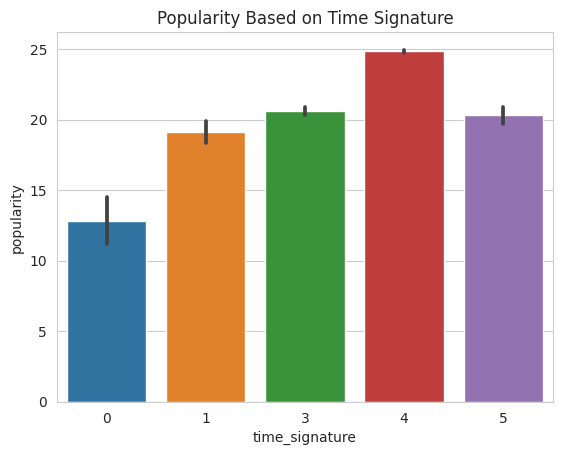

In [8]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

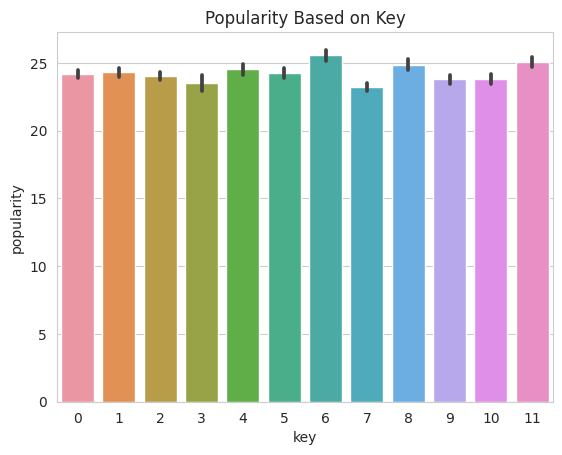

In [9]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

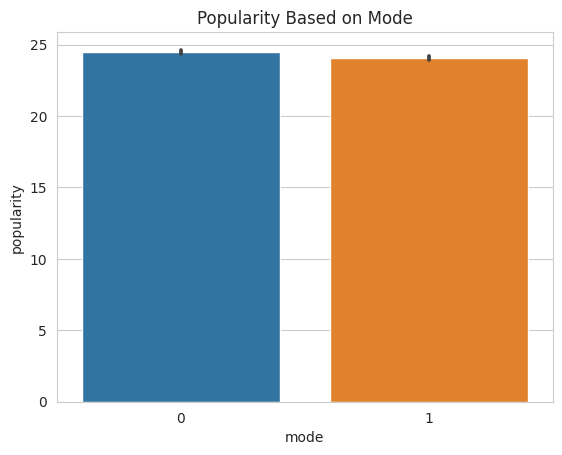

In [10]:
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Mode')

Since key and mode are related (there can be A major or A minor), we combine those two features in another barplot using "hue".

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

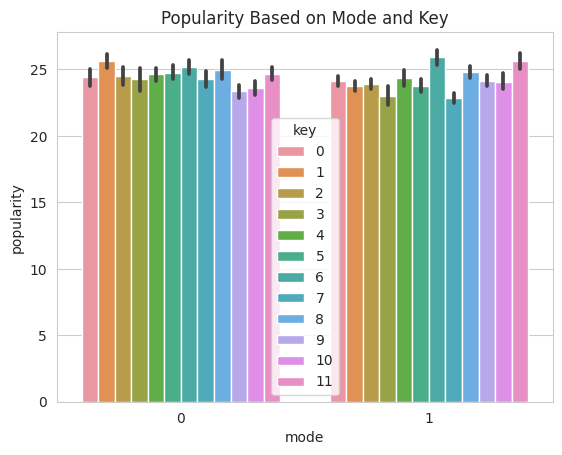

In [11]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularity Based on Mode and Key')

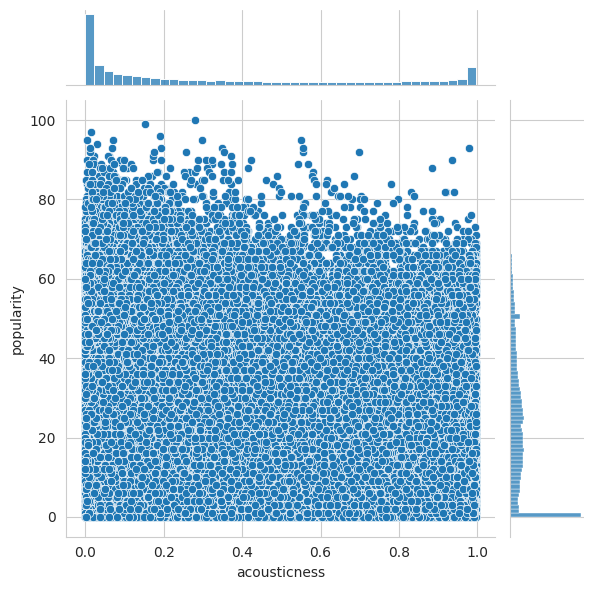

In [12]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = dataframe)

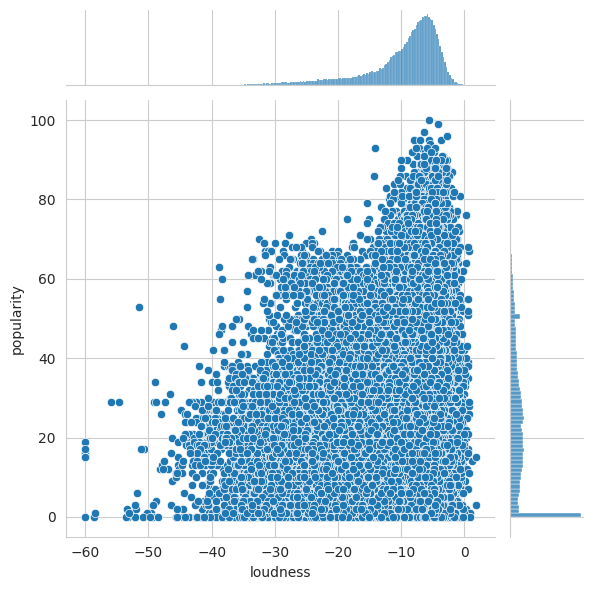

In [13]:
sns.jointplot(x = 'loudness', y = 'popularity', data = dataframe)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

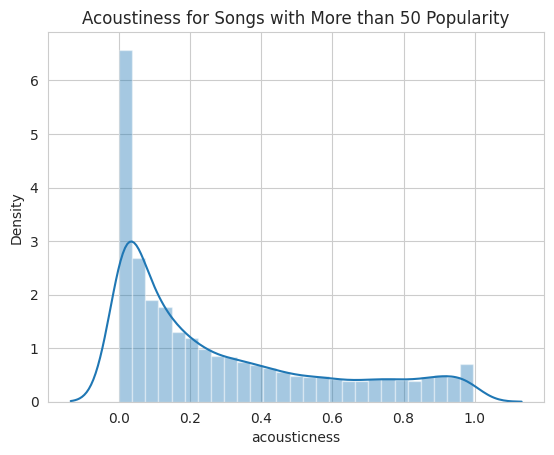

In [14]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

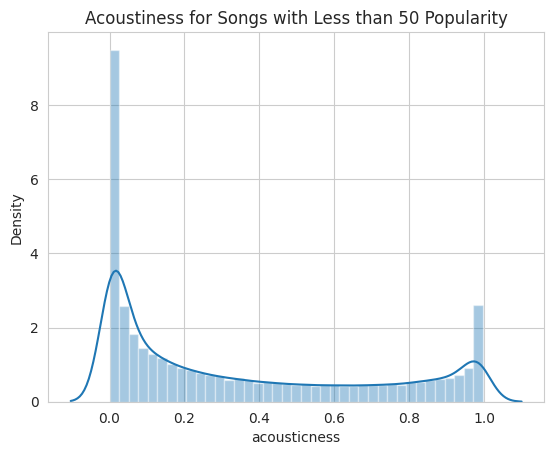

In [15]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

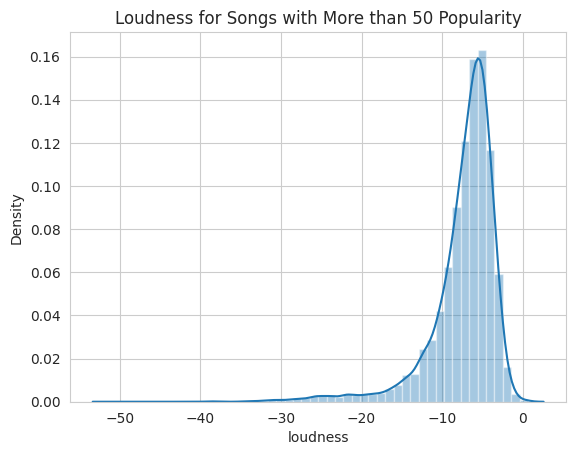

In [16]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

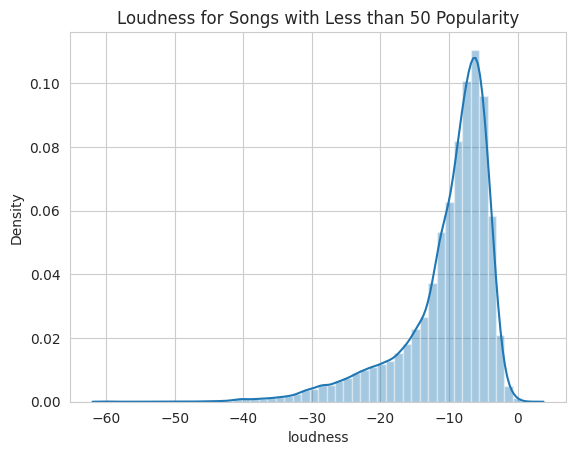

In [17]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

Based on the analysis, we found that the "loudness" and "acousticness" features have a somewhat weak correlation with the popularity of songs. Additionally, we observed that the distribution of loudness and acousticness differs for songs that have a popularity score greater than 50 compared to those with a score less than 50. We have created a summary plot to visualize these relationships between the features.

In [18]:
#sns.pairplot(dataframe)

<h4>Feature Engineering<h4>

We need to convert three categorical variables, namely "key," "mode," and "time signature," into numbers using one-hot-encoding. We also need to define "popularity" as a binary variable, with a score above 57 considered "popular" and encoded as 1, and a score below 75 considered "not popular" and encoded as 0.

For the "key" variable, we will assign a numerical value from 0 to 11 to each of the 12 letter keys (without distinguishing between major and minor), starting from A as 0 and ending with B as 11.

For example, A# will be assigned a value of 1, and so on, until G#, which will be assigned a value of 8. We will then use one-hot-encoding to convert the numerical values into binary values for use in our analysis.

In [19]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
96557,DallasK,3cZERPgr3EpE62ZKG7EHq2,Self Control,0.079900,0.637,225169,0.6000,0.000,10,0.1110,-5.595,1,0.0413,75.505,4,0.403,48
92643,Wolfgang Amadeus Mozart,7LbJrFpdgsCbyx5AbMGSZJ,"Violin Sonata in E Minor, K. 304/300c: II. Tem...",0.986000,0.384,305333,0.0835,0.226,5,0.1230,-19.143,0,0.0404,128.921,3,0.191,14
26483,R. Scott Murphy,2O3Zm2yziYlYU3ClaZPlRg,Don't Sugarcoat It,0.575000,0.706,115044,0.4030,0.000,8,0.3710,-11.529,1,0.9510,131.221,4,0.674,18
90040,White Wizzard,4Dum3sC4BiaCMayrfrozGI,Pretty May,0.000017,0.319,198329,0.9160,0.280,5,0.1820,-5.366,1,0.1260,174.002,4,0.247,14
16694,Rise Cast,4sj48dIdghrXegc7IeYJnf,Just Breathe - Rise Cast Version,0.887000,0.673,179334,0.1810,0.000,7,0.0886,-7.690,1,0.0320,104.124,4,0.483,19


Mode: We will assign major = 1 and minor = 0.

In [20]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
28777,Zhaphree,4KAWGWLHTUQlu0zpsZV30n,Sayf,0.011200,0.853,270878,0.564,0.78000,10,0.1090,-12.718,1,0.0606,139.961,4,0.520,10
32265,Nightwish,0ozbxbhUkifqaEwlqzjqS1,The Carpenter - Remastered,0.003430,0.588,360320,0.717,0.00352,9,0.3080,-7.597,0,0.0319,120.394,4,0.222,21
49169,Summons Support,1MRzN4Qnwbhd4JC4CkGntY,Six Feet,0.000338,0.511,144328,0.686,0.76200,10,0.5610,-13.076,0,0.0339,123.620,4,0.615,0
92624,Petit Biscuit,7ChOz9mxpHcupyMldVotta,Wake Up - Just Kiddin Remix,0.000486,0.775,267966,0.826,0.04140,10,0.0966,-6.782,0,0.0505,123.999,4,0.707,42
55506,Sean Lane,4qUVpqMQsq5olxpJoV8Pdd,Dead Expectations,0.968000,0.473,134427,0.253,0.86300,8,0.3270,-22.438,0,0.0867,118.847,4,0.133,13


In [21]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
32650,Jon Keith,7jD5YS5sbVjnw1lkALi1IV,Come Around,0.126000,0.521,190521,0.607,0.000012,11,0.1070,-7.352,1,0.3460,77.800,4,0.354,22
105963,Joakim Molitor,5hLXYhAxLn64snsHUcRVjt,4U,0.476000,0.734,169048,0.779,0.000008,9,0.0318,-4.483,0,0.0473,125.961,4,0.525,56
86879,DCPA,2rM8rSCzvrmwRvmGbALUhQ,Living,0.011700,0.669,240000,0.715,0.000006,7,0.2670,-8.169,0,0.0839,124.039,4,0.340,2
67958,Hudson River Valley,7bPXdRj3XFgB9CFEml0gnk,Reckless Mix,0.212000,0.642,127000,0.449,0.781000,8,0.1060,-17.131,1,0.0401,101.014,4,0.961,24
51819,Alpha Grand,77Mx4n0jIK2deKjuvzrw6V,Change The World,0.000038,0.459,170283,0.521,0.874000,5,0.6910,-13.253,0,0.0298,123.625,4,0.472,0


<h4>Popularity</h4>

In [22]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.7230,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,1
60,Lecrae,1FYd1szE0RHXOAM00V4MEx,Coming In Hot,0.027100,0.890,200168,0.4540,0.000004,1,0.1570,-8.777,1,0.2600,140.041,4,0.4250,1
158,Curtis Walsh,0C5jmw61aKNP6ngy0FXm56,Full Recovery,0.786000,0.524,176135,0.3070,0.000000,9,0.1110,-9.753,1,0.0465,153.157,4,0.4080,1
262,MYA,01GkSQ5gDn2BHOfgfdUepy,Loco por Ti,0.056800,0.705,194674,0.7120,0.000000,10,0.0921,-5.409,1,0.1560,173.964,4,0.8670,1
277,MEUTE,1MdbDBwEEecnlLiyWChJFh,You & Me,0.652000,0.661,306423,0.5480,0.265000,7,0.0913,-4.053,0,0.0407,75.068,4,0.0954,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,Emmanuelle Rimbaud,3Le8dA7PwImsZxRgEnwnt6,Hopes and Dreams,0.980000,0.298,164649,0.0462,0.941000,1,0.1250,-28.427,1,0.0400,61.299,4,0.2800,1
116303,Olly Murs,6JNSPr0xttWtbHNifT9HGI,Love Me Again,0.034400,0.907,170560,0.5830,0.000000,8,0.0931,-5.763,1,0.0723,126.009,4,0.8750,1
116323,Sick Individuals,2VY3RmDNfIXeHA2X8Ezbj8,Easy,0.086300,0.670,188875,0.7840,0.000020,11,0.1290,-4.415,1,0.0366,157.966,4,0.6360,1
116337,Within Temptation,2cprj4IIX0QXOlk6DrrWxS,Raise Your Banner - Single Edit,0.000269,0.354,212586,0.8580,0.000016,8,0.3830,-7.189,1,0.1030,173.977,3,0.5270,1


<h4>Prediction using Machine Learning Models<h4>

In [23]:
#ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.

In [24]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [25]:
#Define 80% of the dataframe for training and 20% of the dataframe for testing.
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

#Add a validation dataset using train_test_split.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

<H4>Logistic Regression</H4>

In [26]:
# Creating a Logistic Regression model and fitting it to the training data
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)

# Using the trained model to make predictions on the validation data
LR_Predict = LR_Model.predict(X_valid)

# Calculating the accuracy of the model's predictions on the validation data
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

# Calculating the AUC score of the model's predictions on the validation data
LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.9437701396348013
AUC: 0.5


<H4>Random Forest Classifier</H4>

In [27]:
# Creating a Random Forest Classifier model and fitting it to the training data
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)

# Using the trained model to make predictions on the validation data
RFC_Predict = RFC_Model.predict(X_valid)

# Calculating the accuracy of the model's predictions on the validation data
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

# Calculating the AUC score of the model's predictions on the validation data
RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.9446294307196563
AUC: 0.5112336961315851


<H4>K-Nearest Neighbors Classifier</H4>

In [28]:
# Creating a k-Nearest Neighbors Classifier model and fitting it to the training data
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)

# Using the trained model to make predictions on the validation data
KNN_Predict = KNN_Model.predict(X_valid)

# Calculating the accuracy of the model's predictions on the validation data
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

# Calculating the AUC score of the model's predictions on the validation data
KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.9414070891514501
AUC: 0.5000953859765005


<H4>Decision Tree Classifier</H4>

In [29]:
# Create a decision tree model
DT_Model = DecisionTreeClassifier()

# Train the model with X_train and y_train data
DT_Model.fit(X_train, y_train)

# Generate predictions using X_valid data
DT_Predict = DT_Model.predict(X_valid)

 # Calculate accuracy score
DT_Accuracy = accuracy_score(y_valid, DT_Predict)

# Print accuracy score
print("Accuracy: " + str(DT_Accuracy))

# Calculate AUC score
DT_AUC = roc_auc_score(y_valid, DT_Predict)

# Print AUC score
print("AUC: " + str(DT_AUC))

Accuracy: 0.8925886143931256
AUC: 0.5312678220272689


<H4>Linear Support Vector Classification</H4>

In [30]:
# Creating a smaller sample of the training data
training_LSVC = training.sample(10000)

# Assigning the features and target variable for the training data
X_train_LSVC = training_LSVC[features]
y_train_LSVC = training_LSVC['popularity']

# Assigning the features for the test data
X_test_LSVC = dataframe.drop(training_LSVC.index)[features]

# Splitting the training data into training and validation sets
X_train_LSVC, X_valid_LSVC, y_train_LSVC, y_valid_LSVC = train_test_split(
    X_train_LSVC, y_train_LSVC, test_size = 0.2, random_state = 420)

In [31]:
# Creating a Decision Tree Classifier model and fitting it to the training data
LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train_LSVC, y_train_LSVC)

# Using the trained model to make predictions on the validation data
LSVC_Predict = LSVC_Model.predict(X_valid_LSVC)

# Calculating the accuracy of the model's predictions on the validation data
LSVC_Accuracy = accuracy_score(y_valid_LSVC, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy))

# Calculating the AUC score of the model's predictions on the validation data
LSVC_AUC = roc_auc_score(y_valid_LSVC, LSVC_Predict) 
print("AUC: " + str(LSVC_AUC))

Accuracy: 0.893
AUC: 0.5193748539434088


<H4>Model Performance Summary</H4>

In [32]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC,
                                                         LSVC_AUC]})

In [33]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.944629
0,LogisticRegression,0.943770
2,KNeighborsClassifier,0.941407
4,LinearSVC,0.893000
3,DecisionTreeClassifier,0.892589


In [34]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
3,DecisionTreeClassifier,0.531268
4,LinearSVC,0.519375
1,RandomForestClassifier,0.511234
2,KNeighborsClassifier,0.500095
0,LogisticRegression,0.500000
